In [1]:
from dask.distributed import LocalCluster
# from dask_jobqueue import SLURMCluster
from dask.distributed import Client

cluster = LocalCluster()
# cluster = SLURMCluster(cores=24, name='W', walltime='00:30:00',
#                        job_extra=['--constraint=HSW24','--exclusive','--nodes=1'], 
#                        memory='512GB', interface='ib0'
#                       ) 
# cluster.scale(24)
# # # cluster.adapt(minimum=1, maximum=48)

client = Client(cluster)
# client = Client()
client

/scratch/cnt0024/hmg2840/tuchida/mars4/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 32929 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:38451 Dashboard: http://127.0.0.1:32929/status,Cluster Workers: 8 Cores: 56 Memory: 270.19 GB


In [2]:
import numpy as np
import xarray as xr
import pandas as pd
# import numpy_groupies
import dask.array as dsar
import xrft
import qgutils
from xgcm.grid import Grid
import os.path as op
# from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/store/CT1/hmg2840/tuchida/msqg/seas-forcing/'
rund = '/store/tuchida/msom/msqg/'

In [4]:
U = .1
tau = 5e5  # seconds
tau0 = .0001
dt = 5e-2
Rd = 5e4   # Rossby radius (50km)
Re4 = 4e3
# f0 = 8e-5
beta = .5
N = 256*4    # Number of horizontal grids
L0 = 80
H = 5e3
dx = L0/N  # Non-dimensionalized horizontal resolution ((L0*Rd)/N)/Rd
diny = 360
Rom = .025
Ekb = .002*2
ntime = 62.2*5+1

percent = 20
nmemb = 100

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


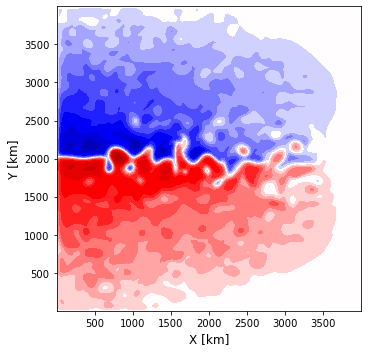

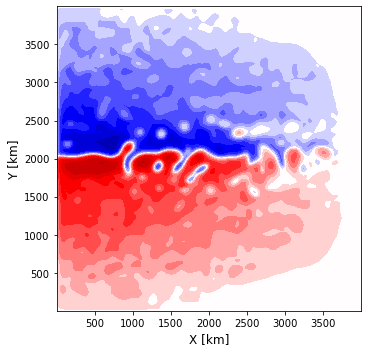

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


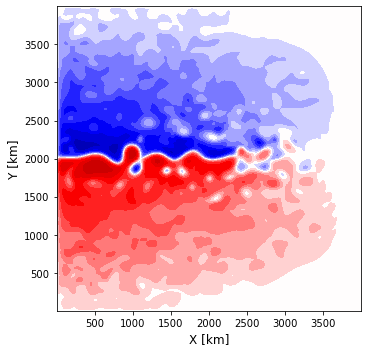

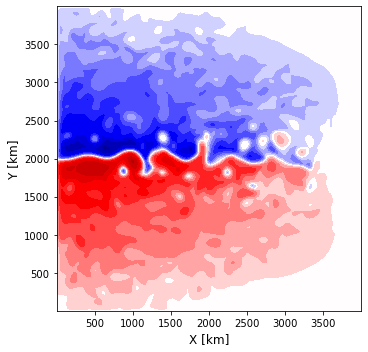

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


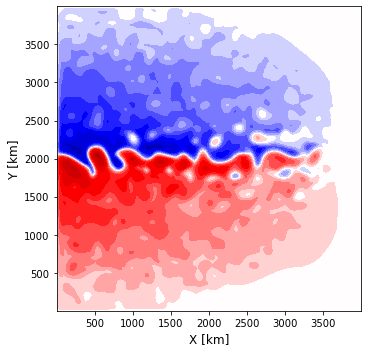

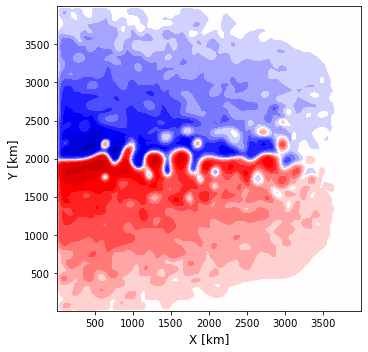

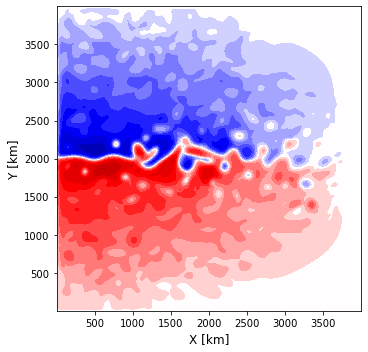

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


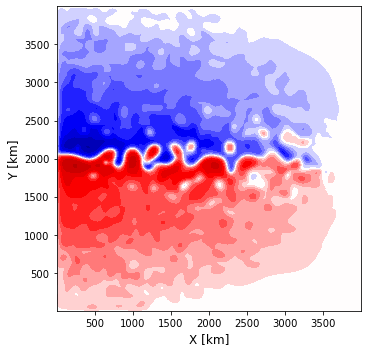

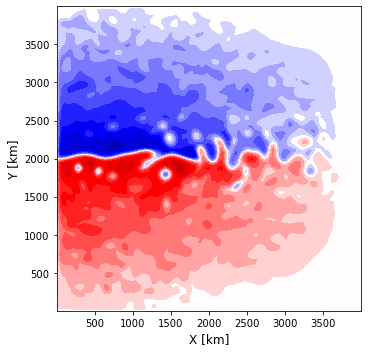

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


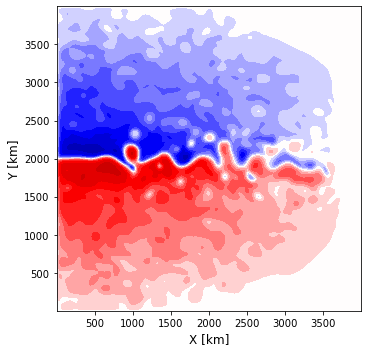

In [26]:
for i in np.arange(100)[::10]:
    ds = xr.open_zarr(op.join(rund,'run%03d/vars%03d/' % (i,1)))
    fig, ax = plt.subplots(figsize=(6,5))
    fig.set_tight_layout(True)
    im = ax.contourf(ds.XC*Rd*1e-3, ds.YC*Rd*1e-3, 
                  ds.psi.isel(time=0,Z=0,Yp1=slice(1,-1),Xp1=slice(1,-1)), 
#                            norm=clr.SymLogNorm(linthresh=1e-2, vmin=-1e1, vmax=1e1, base=10), 
                  levels=np.linspace(-16,16,24),
                  extend='both',
                  cmap='seismic')
    for c in im.collections:
        c.set_rasterized(True)
    ax.set_xlabel(r"X [km]", fontsize=12)
    ax.set_ylabel(r"Y [km]", fontsize=12)
    ax.set_aspect('equal', adjustable='box')
    plt.savefig(op.join(rund,'Figs/SurfPsi_run%03d.pdf' % i))
    plt.show()

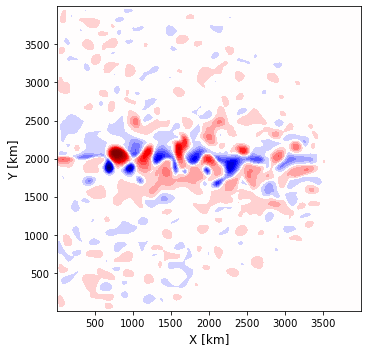

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


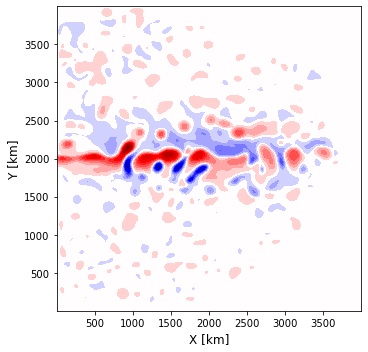

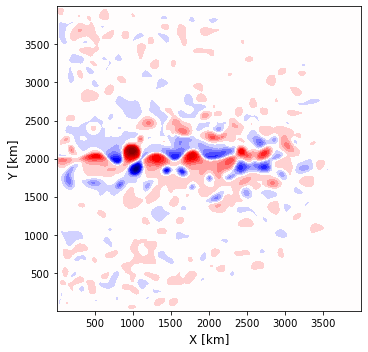

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


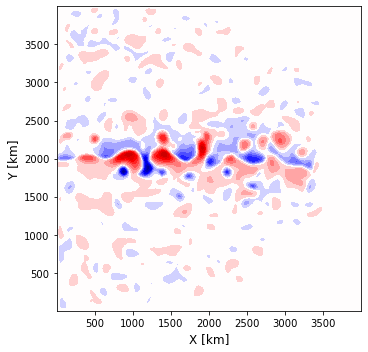

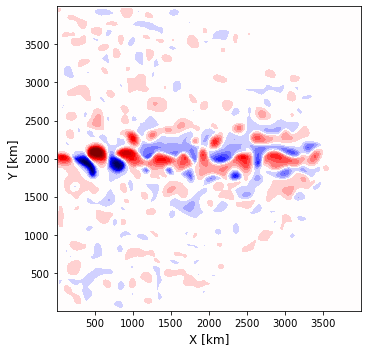

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


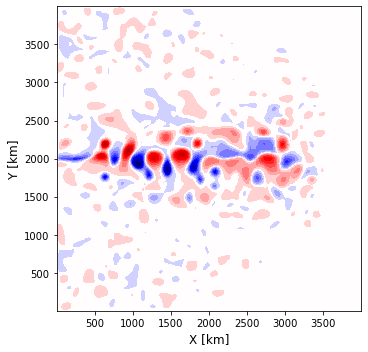

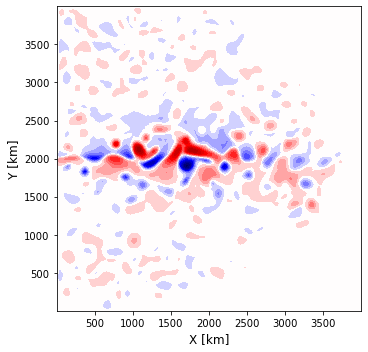

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


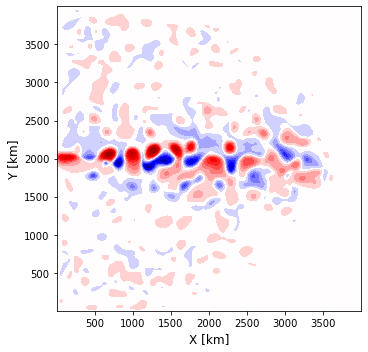

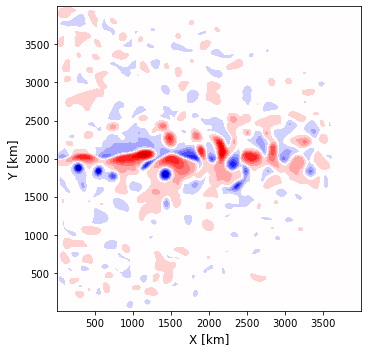

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


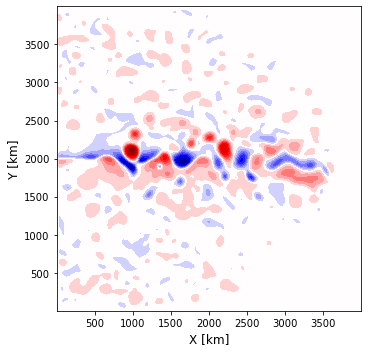

In [27]:
dsb = xr.open_zarr(op.join(rund,"Mean001/%03d-%03d" % (0,6)))
for i in np.arange(100)[::10]:
    ds = xr.open_zarr(op.join(rund,'run%03d/vars%03d/' % (i,1)))
    fig, ax = plt.subplots(figsize=(6,5))
    fig.set_tight_layout(True)
    im = ax.contourf(ds.XC*Rd*1e-3, ds.YC*Rd*1e-3, 
                  ds.psi.isel(time=0,Z=0,Yp1=slice(1,-1),Xp1=slice(1,-1))-dsb.psib.isel(time=0,Z=0,Yp1=slice(1,-1),Xp1=slice(1,-1)), 
#                            norm=clr.SymLogNorm(linthresh=1e-2, vmin=-1e1, vmax=1e1, base=10), 
                  levels=np.linspace(-16,16,24),
                  extend='both',
                  cmap='seismic')
    for c in im.collections:
        c.set_rasterized(True)
    ax.set_xlabel(r"X [km]", fontsize=12)
    ax.set_ylabel(r"Y [km]", fontsize=12)
    ax.set_aspect('equal', adjustable='box')
    plt.savefig(op.join(rund,'Figs/SurfPsip_run%03d.pdf' % i))
    plt.show()

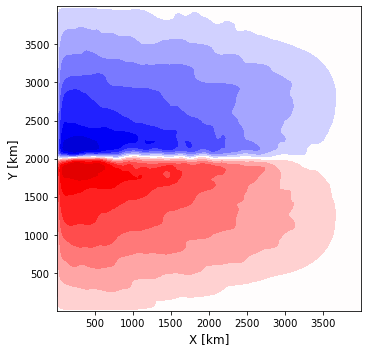

In [28]:
fig, ax = plt.subplots(figsize=(6,5))
fig.set_tight_layout(True)
im = ax.contourf(ds.XC*Rd*1e-3, ds.YC*Rd*1e-3, 
                  dsb.psib.isel(time=0,Z=0,Yp1=slice(1,-1),Xp1=slice(1,-1)), 
#                            norm=clr.SymLogNorm(linthresh=1e-2, vmin=-1e1, vmax=1e1, base=10), 
                  levels=np.linspace(-16,16,24),
                  extend='both',
                  cmap='seismic')
for c in im.collections:
    c.set_rasterized(True)
ax.set_xlabel(r"X [km]", fontsize=12)
ax.set_ylabel(r"Y [km]", fontsize=12)
ax.set_aspect('equal', adjustable='box')
plt.savefig(op.join(rund,'Figs/SurfPsib.pdf' % i))

In [29]:
360-132

228

distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
